# Análisis exploratorio de la base de datos

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Lectura de la base de datos

In [2]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

Descripción de los datos

In [3]:
train_df.info()     # Tenemos 9 atributos y la variable objetivo o label. 1.490 observaciones no nulas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [4]:
test_df.info()   #quedaron 497 observaciones en test. Tienen solamente los atributos, pero no los labels del target. 
#Con lo cual no podemos conocer cuál es el desbalaceo entre los casos en esta fracción del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [5]:
#renombraría Employment Type
train_df.rename(columns={"Employment Type":"EmploymentType"},
                inplace=True)
test_df.rename(columns={"Employment Type":"EmploymentType"},
                inplace=True)


In [6]:
train_df.head(5) 

,Customer,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [7]:
train_df.TravelInsurance.value_counts()    #El dataset está desbalanceado, pero en una magnitud inferior a los casos analizados anteriormente.

0    958
1    532
Name: TravelInsurance, dtype: int64

Porcentaje de clientes a los que se les otorgó el Seguro de viajero:  35.70469798657718 %


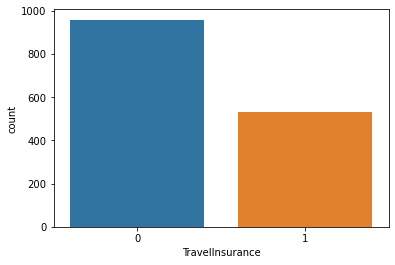

In [8]:
sns.countplot(data=train_df, x="TravelInsurance") 
print("Porcentaje de clientes a los que se les otorgó el Seguro de viajero: ", train_df.TravelInsurance.sum()/train_df.TravelInsurance.count()*100, "%")

En el conjunto de train, al 35.7% de los clientes que solicitaron un Seguro de Viaje se les otorgó el mismo

In [9]:
variables_categóricas=["EmploymentType", "GraduateOrNot","ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad"]
variables_numéricas=["Age","AnnualIncome","FamilyMembers"]   #Customer es solo un id, con lo cual no va a ser relevante para el análisis
target=["TravelInsurance"]

### Analizando las distribuciones de las variables de manera independiente

Edad mínima:  25
Edad máxima:  35


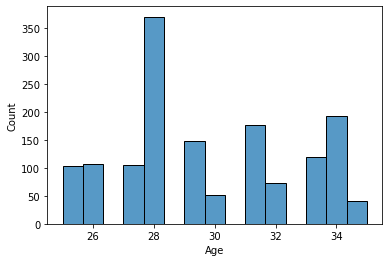

In [10]:
#Histograma para la distribución de la variable EDAD
sns.histplot(data=train_df, x="Age")    #La distribución tiene muchos baches, con lo cual discretizarla podría ser una buena opción
print("Edad mínima: ", train_df.Age.min())
print("Edad máxima: ", train_df.Age.max())

Ingreso Anual Promedio:  927818.7919463087
Ingreso Anual Mediano:  900000.0


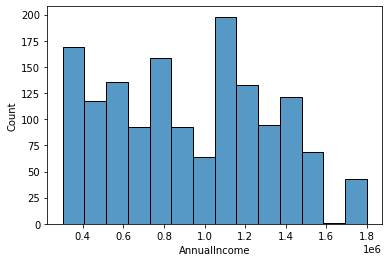

In [11]:
#Histograma para la distribución de la variable INGRESO ANUAL
sns.histplot(data=train_df, x="AnnualIncome")
print("Ingreso Anual Promedio: ", train_df.AnnualIncome.mean())
print("Ingreso Anual Mediano: ", train_df.AnnualIncome.median())    #Se pone de manifiesto un leve sesgo a la derecha, típico de las distribuciones de este tipo de variables

<AxesSubplot:xlabel='FamilyMembers', ylabel='Count'>

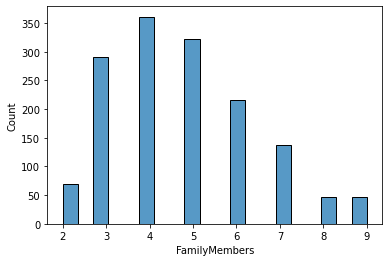

In [12]:
#Histograma para la distribución de la variable CANTIDAD DE MIEMBROS EN LA FAMILIA
sns.histplot(data=train_df, x="FamilyMembers")   

<AxesSubplot:xlabel='FamilyMembers', ylabel='count'>

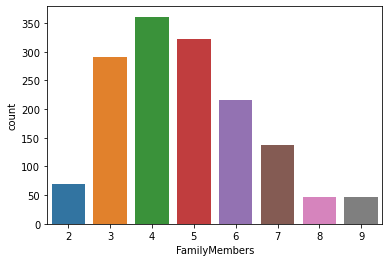

In [13]:
#Countplot para la distribución de la variable CANTIDAD DE MIEMBROS EN LA FAMILIA
sns.countplot(data=train_df, x="FamilyMembers")    # si bien es numérica, tiene una catidad limitada de valores posibles, y todos ellos son valores enteros

Porcentaje de clientes que tienen enfermedades crónicas:  27.583892617449663 %


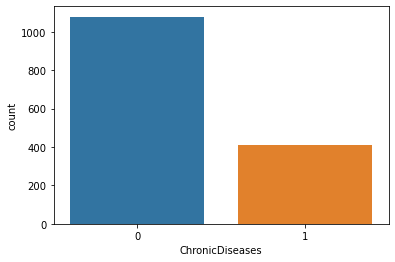

In [14]:
#Countplot para la distribución de la variable ENFERMEDADES CRÓNICAS
sns.countplot(data=train_df, x="ChronicDiseases")    
print("Porcentaje de clientes que tienen enfermedades crónicas: ", train_df.ChronicDiseases.sum()/train_df.ChronicDiseases.count()*100, "%")

Porcentaje de clientes que trabaja en Sector privado o independiente:  70.93959731543625 %
Porcentaje de clientes que trabaja en Sector público:  29.06040268456376 %


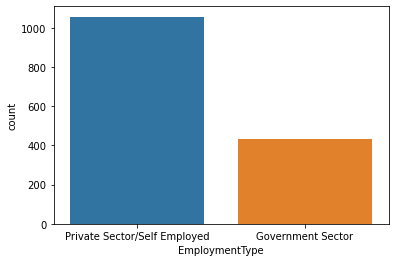

In [15]:
#Countplot para la distribución de la variable TIPO DE EMPLEO
sns.countplot(data=train_df, x="EmploymentType")    
print("Porcentaje de clientes que trabaja en Sector privado o independiente: ", train_df[train_df.EmploymentType=="Private Sector/Self Employed"]["EmploymentType"].count()/train_df["EmploymentType"].count()*100, "%")
print("Porcentaje de clientes que trabaja en Sector público: ", train_df[train_df.EmploymentType=="Government Sector"]["EmploymentType"].count()/train_df["EmploymentType"].count()*100, "%")

Porcentaje de clientes que están graduados:  85.1006711409396 %


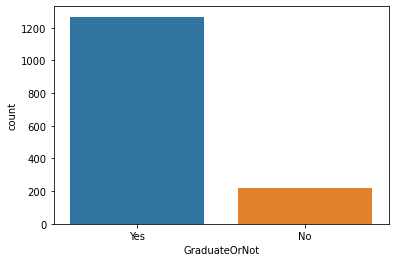

In [16]:
#Countplot para la distribución de la variable que indica SI ESTÁ GRADUADO O NO
sns.countplot(data=train_df, x="GraduateOrNot")    
print("Porcentaje de clientes que están graduados: ", train_df[train_df.GraduateOrNot=="Yes"]["GraduateOrNot"].count()/train_df["GraduateOrNot"].count()*100, "%")

Porcentaje de clientes que son viajeros frecuentes:  21.2751677852349 %


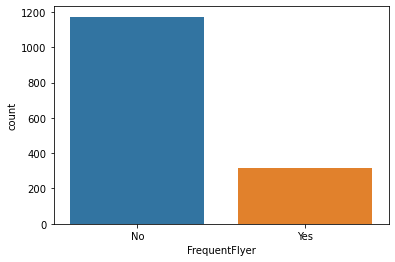

In [17]:
#Countplot para la distribución de la variable que indica SI ES UN VIAJERO FRECUENTE O NO
sns.countplot(data=train_df, x="FrequentFlyer")   
print("Porcentaje de clientes que son viajeros frecuentes: ", train_df[train_df.FrequentFlyer=="Yes"]["FrequentFlyer"].count()/train_df["FrequentFlyer"].count()*100, "%")

Porcentaje de clientes que alguna vez viajaron al exterior:  19.328859060402685 %


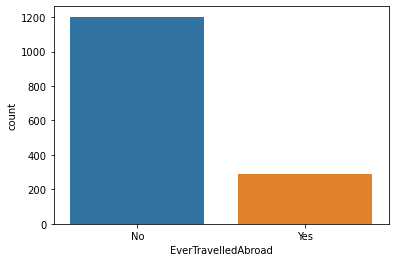

In [18]:
#Countplot para la distribución de la variable que indica SI HA VIAJADO AL EXTERIOR ALGUNA VEZ
sns.countplot(data=train_df, x="EverTravelledAbroad")   
print("Porcentaje de clientes que alguna vez viajaron al exterior: ", train_df[train_df.EverTravelledAbroad=="Yes"]["EverTravelledAbroad"].count()/train_df["EverTravelledAbroad"].count()*100, "%")

### Análisis conjunto de los atributos

In [19]:
#Heat map para correlaciones, aunque no sea la mejor medida por el tipo de variables
train_df[["Age","AnnualIncome","FamilyMembers","ChronicDiseases","TravelInsurance"]].corr("spearman")

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,0.001116,0.005776,0.006821,0.058329
AnnualIncome,0.001116,1.000000,-0.005856,0.003513,0.396871
FamilyMembers,0.005776,-0.005856,1.000000,0.022799,0.075657
ChronicDiseases,0.006821,0.003513,0.022799,1.000000,0.019600
TravelInsurance,0.058329,0.396871,0.075657,0.019600,1.000000


<AxesSubplot:xlabel='AnnualIncome', ylabel='Density'>

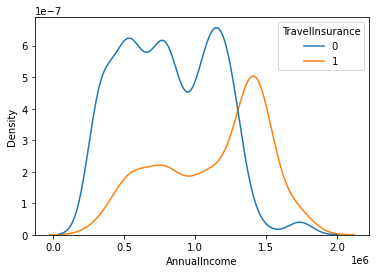

In [20]:
#Histograma para la distribución de la variable INGRESO ANUAL, por si recibió un Seguro de Viaje o no
sns.kdeplot(data=train_df, x="AnnualIncome", hue="TravelInsurance")
#Se pone de manifiesto el sesgo a otorgar una mayor proporción de seguros de viajes a personas con mayores ingresos anuales

<AxesSubplot:xlabel='Age', ylabel='Density'>

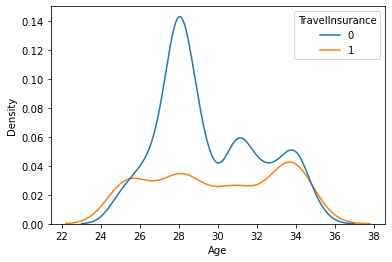

In [21]:
#Histograma para la distribución de la variable EDAD, según si recibió un Seguro de Viaje o no
sns.kdeplot(data=train_df, x="Age", hue="TravelInsurance")
#En cuanto a la edad, se advierte mayor proporción de Seguros de Viajes otorgados entre las personas más cercanas al máximo de edad (35 años)
#Esto puede estar vinculado a que suelen ser los que tienen mayores niveles de ingreso, generalmente. Así como también al hecho de que llevan a cabo otro tipo de viajes, probablemente de menor riesgo

<AxesSubplot:xlabel='FamilyMembers', ylabel='count'>

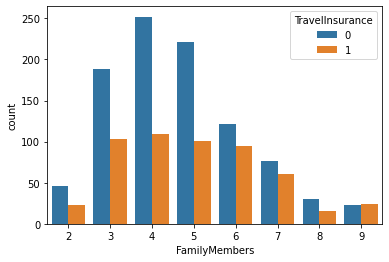

In [22]:
sns.countplot(data=train_df, x="FamilyMembers", hue="TravelInsurance")

In [23]:
pd.crosstab(train_df.FamilyMembers,train_df.TravelInsurance, margins=True, normalize="index")
#No se advierte un patrón claro
#La probabilidad de que otorguen el seguro es mayor en familias de 9, 6 o7 miembros. Los menores valores se observan en familias de 5 miembros o menos.

TravelInsurance,0,1
FamilyMembers,,
2,0.666667,0.333333
3,0.646048,0.353952
4,0.698061,0.301939
5,0.686335,0.313665
6,0.560185,0.439815
7,0.557971,0.442029
8,0.652174,0.347826
9,0.489362,0.510638
All,0.642953,0.357047


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmploymentType', ylabel='count'>

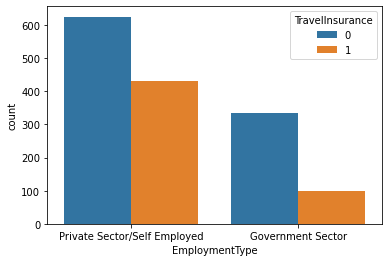

In [31]:
fig = plt.figure(figsize=(6,4))
sns.countplot(train_df.EmploymentType,  hue=train_df.TravelInsurance )

In [24]:
pd.crosstab(train_df.EmploymentType,train_df.TravelInsurance, margins=True, normalize="index")
#La probabilidad de que otorgen el Seguro es mayor entre las personas que tienen trabajo en el sector privado o son autoempleados

TravelInsurance,0,1
EmploymentType,,
Government Sector,0.769053,0.230947
Private Sector/Self Employed,0.591296,0.408704
All,0.642953,0.357047


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GraduateOrNot', ylabel='count'>

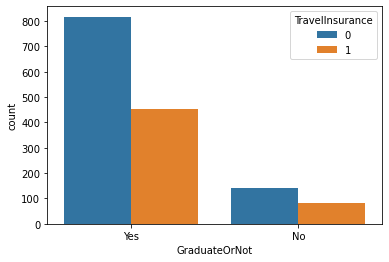

In [32]:
fig = plt.figure(figsize=(6,4))
sns.countplot(train_df.GraduateOrNot,  hue=train_df.TravelInsurance )

In [25]:
pd.crosstab(train_df.GraduateOrNot,train_df.TravelInsurance, margins=True, normalize="index")
#La probabilidad de que otorguen el seguro no difiere de manera significativa entre aquellos que son graduados y los que no

TravelInsurance,0,1
GraduateOrNot,,
No,0.635135,0.364865
Yes,0.644322,0.355678
All,0.642953,0.357047


In [37]:
##Test chi-cuadrado para analizar si es relevante o no esta variable
graduate=pd.crosstab(train_df.TravelInsurance,train_df['GraduateOrNot'], normalize='index')
chi2, p, dof, ex =stats.chi2_contingency(graduate)
print("Chi2", chi2)
print("p-value=", p)
print("grados de libertad=", dof)
print("frecuencias esperadas=", ex)

Chi2 3.887881670371682
p-value= 0.04863573130963272
grados de libertad= 1
frecuencias esperadas= [[0.14971863 0.85028137]
 [0.14971863 0.85028137]]


El test de chi2 evidenció un efecto significativo de la variable `GraduateOrNot`sobre la variable a predecir `TravelInsurance` (p= 0.0486).

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChronicDiseases', ylabel='count'>

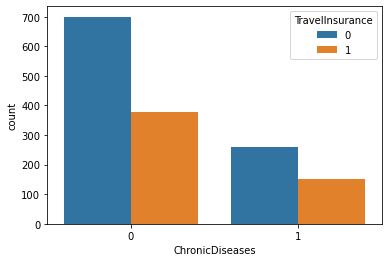

In [38]:
fig = plt.figure(figsize=(6,4))
sns.countplot(train_df.ChronicDiseases,  hue=train_df.TravelInsurance )

In [27]:
pd.crosstab(train_df.ChronicDiseases,train_df.TravelInsurance, margins=True, normalize="index")
#La probabilidad de que otorguen el seguro no difiere de manera significativa entre aquellos que tiene enfermadades crónicas y los que no

TravelInsurance,0,1
ChronicDiseases,,
0,0.648749,0.351251
1,0.627737,0.372263
All,0.642953,0.357047


In [39]:
##Test chi-cuadrado para analizar si es relevante o no esta variable 
diseases=pd.crosstab(train_df.TravelInsurance,train_df['ChronicDiseases'], normalize='index')
chi2, p, dof, ex =stats.chi2_contingency(diseases)
print("Chi2", chi2)
print("p-value=", p)
print("grados de libertad=", dof)
print("frecuencias esperadas=", ex)

Chi2 2.3984276735920105
p-value= 0.12145727166112354
grados de libertad= 1
frecuencias esperadas= [[0.72154748 0.27845252]
 [0.72154748 0.27845252]]


El test de chi2 no mostró una relación significativa entre la variable `ChronicDiseases` y la variable a predecir `TravelInsurance` (p= 0.1214).

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FrequentFlyer', ylabel='count'>

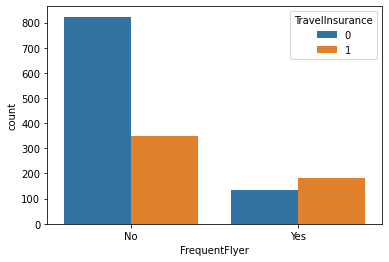

In [40]:
fig = plt.figure(figsize=(6,4))
sns.countplot(train_df.FrequentFlyer,  hue=train_df.TravelInsurance )

In [29]:
pd.crosstab(train_df.FrequentFlyer,train_df.TravelInsurance, margins=True, normalize="index")
#La probabilidad de que otorguen el Seguro de viaje es mayor entre el grupo de clientes que son viajeros frecuentes

TravelInsurance,0,1
FrequentFlyer,,
No,0.701620,0.298380
Yes,0.425868,0.574132
All,0.642953,0.357047


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverTravelledAbroad', ylabel='count'>

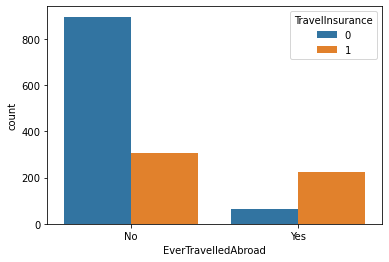

In [41]:
fig = plt.figure(figsize=(6,4))
sns.countplot(train_df.EverTravelledAbroad,  hue=train_df.TravelInsurance )

In [30]:
pd.crosstab(train_df.EverTravelledAbroad,train_df.TravelInsurance, margins=True, normalize="index")
#La probabilidad de que otorguen el Seguro de viaje es mayor entre el grupo de clientes que han viajado al exterior previamente

TravelInsurance,0,1
EverTravelledAbroad,,
No,0.745424,0.254576
Yes,0.215278,0.784722
All,0.642953,0.357047


Luego de un primer análisis exploratorio, podríamos identificar algunos insigths respecto del vínculo de los atributos y la variables objetivo: 
- La variable que más se correlaciona con el otorgamiento del seguro es "AnnualIncome"
- Entre las variables categóricas, las que más se vinculan con el otorgamiento del seguro serían: "EverTravelledAbroad","FrequentFlyer", "EmploymentType".
- Luego, la edad podría ser otro factor relevante.
- No se advirtió un vínculo muy relevante entre el otorgamiento del seguro y la variable "ChronicDiseases"


Cabe mencionar que, de todos modos, el análisis aquí presentado corresponde únicamente al grupo de observaciones incluídas en el conjunto de train. Si bien se espera que sea representativo de todos los datos, el vínculo entre las variables podría diferir en algunos puntos.